In [1]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [3]:
# a) Load dữ liệu các khuôn mặt: 'sklearn.datasets.fetch_lfw_people'
print('\n*** Load dữ liệu các khuôn mặt: sklearn.datasets.fetch_lfw_people:')
from sklearn.datasets import fetch_lfw_people
faces = fetch_lfw_people(min_faces_per_person = 40) #60
type(faces)

print(faces.target_names)
print(faces.images.shape)

faces.images[0].shape
faces.data[0].size



*** Load dữ liệu các khuôn mặt: sklearn.datasets.fetch_lfw_people:
['Ariel Sharon' 'Arnold Schwarzenegger' 'Colin Powell' 'Donald Rumsfeld'
 'George W Bush' 'Gerhard Schroeder' 'Gloria Macapagal Arroyo'
 'Hugo Chavez' 'Jacques Chirac' 'Jean Chretien' 'Jennifer Capriati'
 'John Ashcroft' 'Junichiro Koizumi' 'Laura Bush' 'Lleyton Hewitt'
 'Luiz Inacio Lula da Silva' 'Serena Williams' 'Tony Blair'
 'Vladimir Putin']
(1867, 62, 47)


2914

In [4]:
# b) Thực hiện giảm chiều dữ liệu từ ~3000 xuống còn 150
print('\n*** Thực hiện giảm chiều dữ liệu từ ~3000 xuống còn 150:')
pca = PCA(44) #150
pca.fit(faces.data)

# access values and vectors
# components_ : array, shape (n_components, n_features)
# Các trục chính trong không gian feature, biểu thị
# các hướng của phương sai tối đa trong dữ liệu
# explained_variance_ : array, shape (n_components,)
# Số lượng phương sai được giải thích bởi từng thành phần được chọn.
print('PCA.Components:\n', pca.components_)
print('PCA.Shape: ', pca.components_.shape)
print('PCA.Explained variance: ', pca.explained_variance_)
print('PCA.Explained variance shape: ', pca.explained_variance_.shape)
print(sum(pca.explained_variance_ratio_))

# transform data
components = pca.transform(faces.data)
projected  = pca.inverse_transform(components)



*** Thực hiện giảm chiều dữ liệu từ ~3000 xuống còn 150:
PCA.Components:
 [[-0.00467897 -0.00549964 -0.00664057 ... -0.00933707 -0.00779144
  -0.0067299 ]
 [ 0.01621418  0.01505311  0.01508304 ... -0.03526613 -0.03415551
  -0.03252561]
 [ 0.02832962  0.02735485  0.02670225 ...  0.04293802  0.03990202
   0.03724959]
 ...
 [-0.0158399  -0.01337802 -0.01543522 ...  0.01575612  0.01604802
   0.01595019]
 [ 0.02067908  0.01785153  0.01307371 ...  0.02221323  0.0047254
  -0.00926774]
 [-0.00187867 -0.00746749 -0.01457666 ... -0.02727655 -0.0150741
  -0.0016037 ]]
PCA.Shape:  (44, 2914)
PCA.Explained variance:  [942577.    593669.6   319910.38  287002.53  200323.33  128994.234
  99921.73   85882.625  84306.34   74947.02   72987.8    66410.695
  57721.77   49826.293  47798.797  45640.125  42411.926  39052.332
  35885.98   32977.113  29490.158  28151.975  26411.875  24540.932
  22885.729  22256.814  21747.564  21285.865  19737.254  19376.744
  17565.06   17061.863  15921.238  15168.363  14619.


*** c) Trực quan hóa dữ liệu:


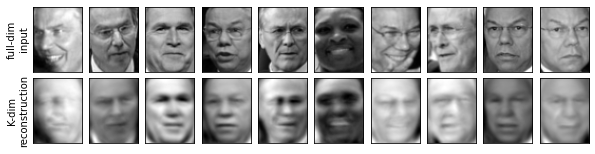

In [5]:
print('\n*** c) Trực quan hóa dữ liệu:')
# Plot the results
fig, ax = plt.subplots(2, 10, figsize=(10, 2.5),
                       subplot_kw={'xticks': [], 'yticks': []},
                       gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i in range(10):
    ax[0, i].imshow(faces.data[i].reshape(62, 47), cmap='binary_r')
    ax[1, i].imshow(projected[i].reshape(62, 47), cmap='binary_r')
    ax[0, 0].set_ylabel('full-dim\ninput')
    ax[1, 0].set_ylabel('K-dim\nreconstruction')